In [74]:
import random
import pandas as pd
import numpy as np
from numpy import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hypergeom

In [75]:
count_of_elements = 100000

In [76]:
def make_collection_of_values(list_of_values: list[float]) -> Counter[float]:
    "Discrete distribution function (frequency polygon)"
    return Counter(list_of_values)

In [77]:
# Binomial 
def generate_list_of_values_binomial(count_of_elements: int):
    bin_list = np.random.binomial(n=4, p=0.666666667, size=100000)
    return list(bin_list)



In [78]:
# HYPERGEOM
def generate_hypergeom(size):
    N = 30 # всего
    A = 20 # Общее количесво желаемых элементов
    n = 4 # количесво опытов
    return list(hypergeom.rvs(N, A, n, size=size))

In [79]:
# display 
def display(x_t, y_t, x_p, y_p, title_):
    plt.bar(x_t, y_t, width=0.4, align='edge', label="Теоретические")
    plt.bar(x_p, y_p, width=0.4, color = 'orange', label="Практические")
    plt.xlabel("Blue - Теоретические Orange - Практические")
    plt.title(title_)
    # sns.distplot(x, hist=True, kde=False)
    # # sns.distplot(y, hist=True, kde=False)
    plt.show()



In [80]:
map_intervals_binomial_teoret = Counter({0: 1234, 1: 9876, 2: 29600, 3:39500, 4: 19763})
map_intervals_hypergeon_teoret = Counter({0: 766, 1: 8757, 2: 31190, 3:41598, 4:17679})

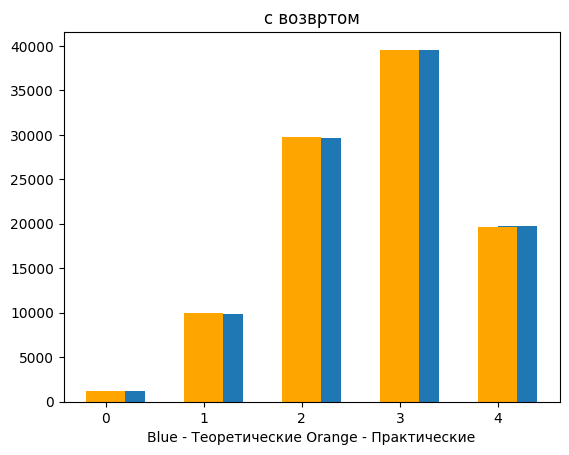

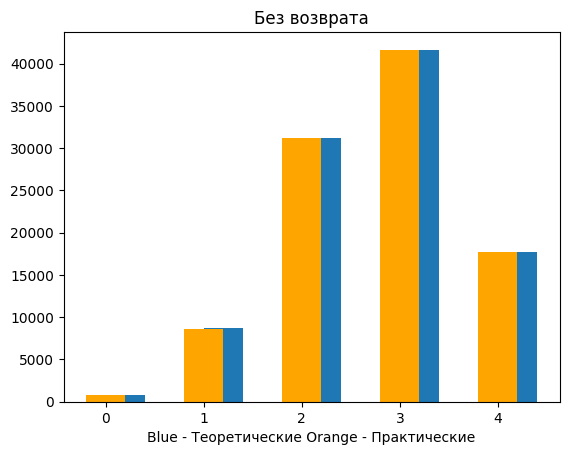

Counter({3: 39565, 2: 29726, 4: 19636, 1: 9922, 0: 1151})
Counter({3: 41637, 2: 31187, 4: 17721, 1: 8656, 0: 799})


In [81]:
list_values_binomial: list = generate_list_of_values_binomial(count_of_elements)
list_values_hypergeom: list = generate_hypergeom(count_of_elements)

map_intervals_binomial_practice = make_collection_of_values(list_values_binomial)
map_intervals_hypergeon_practice = make_collection_of_values(list_values_hypergeom)
display(list(map_intervals_binomial_teoret.keys()), list(map_intervals_binomial_teoret.values())\
       ,list(map_intervals_binomial_practice.keys()), list(map_intervals_binomial_practice.values()), "с возвртом")

display(list(map_intervals_hypergeon_teoret.keys()), list(map_intervals_hypergeon_teoret.values())\
       ,list(map_intervals_hypergeon_practice.keys()), list(map_intervals_hypergeon_practice.values()), "Без возврата")      


# display(list_values_hypergeom)
print(map_intervals_binomial_practice)
print(map_intervals_hypergeon_practice)

In [82]:
# def generate_list_of_values(count_of_elements: int) -> list[float]:
#     "Generate subsequence to list"
#     list_of_values: list = [round(random.uniform(0, 5), 3) \
#                             for i in range(count_of_elements)]
#     return list_of_values

# print(generate_list_of_values(count_of_elements))

In [83]:
def make_intervals_population(list_of_values: list, interval: int):
    'counting values in an interval'
    s = pd.Series(list_of_values)
    # s = s.groupby(pd.cut(s, bins = interval), observed= True)\
    #            .apply(lambda x: x.to_list())
    s = pd.cut(s, bins=interval, right=False).value_counts()
    print(s)
    print(type(s))